## Billionaires Analysis

In [129]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [130]:
# importing dataset
df=pd.read_csv('billionaire.csv')
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


#### Before we go ahead, let’s see whether or not this dataset contains missing values:

In [131]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

### So this dataset has 79 missing values in the Age column, let’s remove these rows:

In [132]:
df = df.dropna()

In [133]:
# checking datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   object 
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 167.2+ KB


### The NetWorth column in this dataset has a $ sign at the beginning of Billionaires’ Net worth and B at the end. So we need to remove these signs and convert the NetWorth column to float:

In [134]:
df['NetWorth'] = df['NetWorth'].str.strip('$')
df['NetWorth'] = df['NetWorth'].str.strip('B')
df['NetWorth'] = df['NetWorth'].astype('float')

In [135]:
# checking again datatypes of each column after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   float64
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 167.2+ KB


### Now let’s have a look at the top 10 billionaires according to their NetWorth:

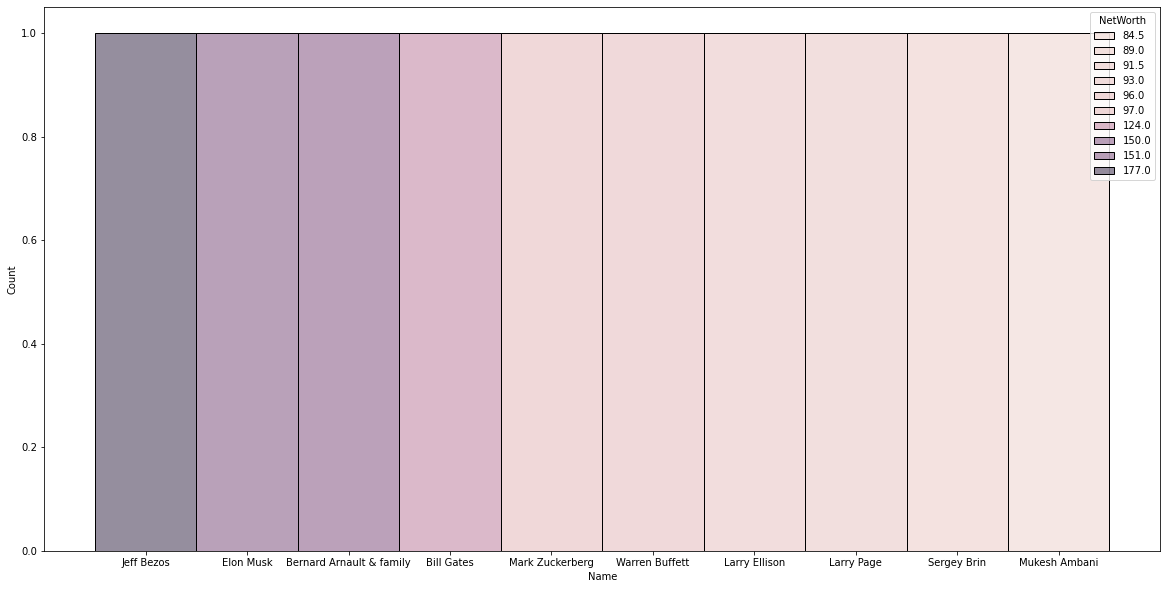

In [136]:
df1 = df.sort_values(by=['NetWorth'], ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x='Name', data=df1, hue='NetWorth')
plt.show()

### Now let’s have a look at the top 5 domains with the most number of billionaires:

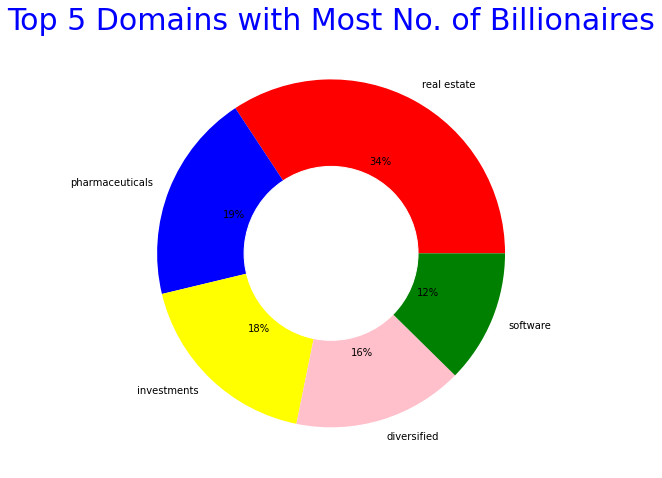

In [137]:
a = df['Source'].value_counts().head()
index = a.index
sources = a.values
custom_colors = ['red', 'blue', 'yellow', 'pink', 'green']
plt.figure(figsize=(8,8))
plt.pie(sources, labels=index, colors=custom_colors, autopct='%1.0f%%')
central_circle = plt.Circle((0,0),0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 20)
plt.title('Top 5 Domains with Most No. of Billionaires', size=30, color='blue')
plt.show()

### Now let’s have a look at the top 5 industries with the most number of billionaires:

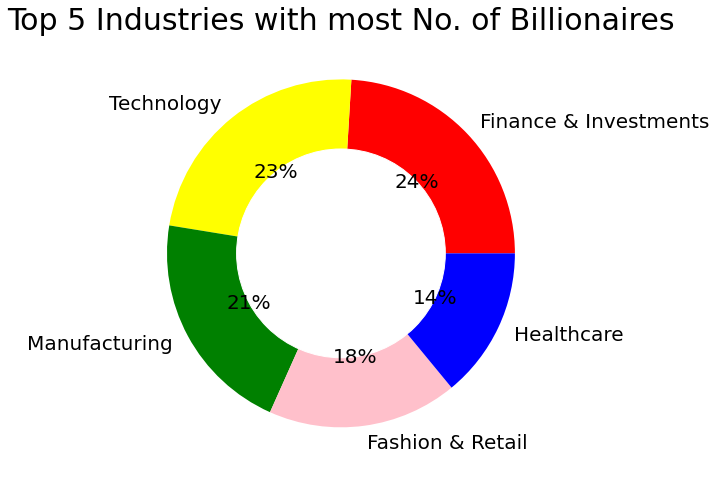

In [138]:
b = df['Industry'].value_counts().head()
index = b.index
industries = b.values
plt.figure(figsize=(8,8))
plt.pie(industries, labels=index, colors=['red', 'yellow', 'green', 'pink', 'blue'], autopct='%1.0f%%')
central_circle = plt.Circle((0,0), 0.6, color='white')
plt.gcf().gca().add_artist(central_circle)
plt.rc('font', size=20)
plt.title('Top 5 Industries with most No. of Billionaires', size=30)
plt.show()

### Now let’s have a look at the top 5 countries with the most number of billionaires:

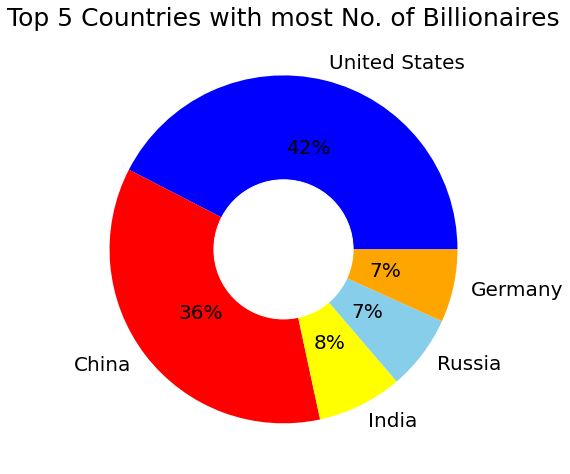

In [139]:
c = df['Country'].value_counts().head()
index = c.index
countries = c.values
plt.figure(figsize=(8,8))
plt.pie(countries, labels=index, colors=['blue', 'red', 'yellow', 'skyblue', 'orange'], autopct='%1.0f%%')
central_circle = plt.Circle((0,0), 0.4, color='white')
plt.gcf().gca().add_artist(central_circle)
plt.rc('font', size=20)
plt.title('Top 5 Countries with most No. of Billionaires', size=25)
plt.show()

### The visualization above shows that the United States and China are the countries from which most people become billionaires. So that means the business environment and the startup success rate is really good in the US and China compared to the rest of the world.